# **El Umbral Simple y Adaptativo**

## ¿Qué es el Umbral Simple?

El Umbral Simple es una técnica de procesamiento de imágenes que permite convertir una imagen en escala de grises en una imagen binaria. Esta se define mediante un único valor de umbral que ayuda a separar los pixeles en dos categorías llamadas: primer plano y fondo. 

## ¿Para qué sirve?

Sirve para facilitar el análisis y la interpretación de las imagenes al simplificar su representación, también, permite la identificación y el aislamiento de objetos de interés en la imagen.

## ¿Cómo se definen sus parámetros?

Sus parámetros se definen de la siguiente manera:

- ```src``` => Imagen de entrada en escala de grises.

- ```tresh``` => El valor que va a tener el umbral.
- ```maxval``` => El valor asignado a los pixeles que superan el umbral (generalmente 255).
- ```type``` => Es el tipo de umbralización, por ejemplo:
    - ```cv2.THRESH_BINARY``` => Se encarga de convertir los pixeles en blanco (255) si son mayores que el umbral y en negro (0) si son menores o iguales, también, es útil para segmentar los objetos de interés en imágenes con buen contraste.
- ```dst``` => La imagen de salida que vendría a ser opcional


## Ventajas y Desventajas del Umbral Simple

#### Ventajas

- Permite una implementación más simple.
- Se considera rápido en términos de procesamiento.

#### Desventajas

- No es capaz de adaptarse a variaciones de iluminación.
- Puede resultar no tan eficaz en imágenes con ruido o fondos complejos.

## ¿Qué es el Umbral Adaptativo?

El umbral adaptativo es una técnica de procesamiento de imágenes que se encarga de ajustar el umbral de manera dinámica en función de las características locales de la imagen, también, permite segmentar las imágenes en condiciones de iluminación y variable. 

## ¿Para qué Sirve?

Sirve para mejorar la segmentación de los objetos en las imágenes donde la iluminación no es uniforme y resulta ser muy útil en las aplicaciones cómo la detección de objetos y el análisis de escenas complejas. 

## ¿Cómo se definen sus parámetros?

Sus parámetros se definen de la siguiente manera:

- ```src``` => La imagen de entrada en escala de grises.

- ```maxValue``` => Es el valor asignado a los píxeles que superan el umbral local (generalmente 255).
- ```adaptiveMethod``` => Es el método para calcular el umbral, por ejemplo:
    - ```cv2.ADAPTIVE_THRESH_MEAN_C``` => Aquí el umbral se calcula como una medida de los pixeles en la vecindad.
    
    - ```cv2.ADAPTIVE_THRESH_GAUSSIAN_C``` => Aquí el umbral se calcula como una medida ponderada (gaussiana) de los píxeles de la vecindad, lo que permite un mejor manejo de las variaciones de iluminación en la imagen.
- ```thresholdType``` => Es el típo de umbralización, por ejemplo:
    - ```cv2.THRESH_BINARY``` => Es similar al umbral simple, este convierte los pixeles en blanco (255) si son mayores que en el umbral y en negro (0) si son menores o iguales. 
- ```blockSize``` => Es el tamaño de la vecindad para calcular el umbral local (debe ser impar).
- ```C``` => Es la constante que se resta del umbral calculado.

## Ventajas y Desventajas del Umbral Adaptativo

#### Ventajas

- Permite una mejor segmentación en imágenes con variaciones de iluminación. 
- Tiene la capacidad para detectar objetos en fondos complejos.

#### Desventajas

- Tiene una mayor complejidad computacional.
- Su tiempo de procesamiento resulta ser más largo a comparación del umbral simple.

## Ejemplo de Aplicación del Umbral Simple y Adaptativo

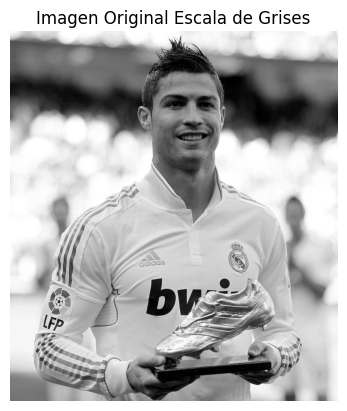

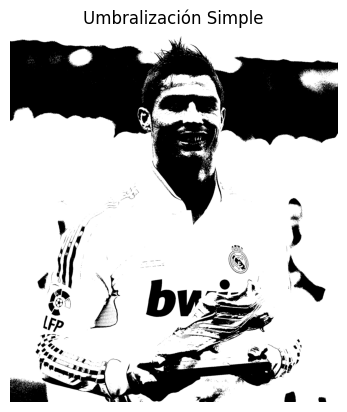

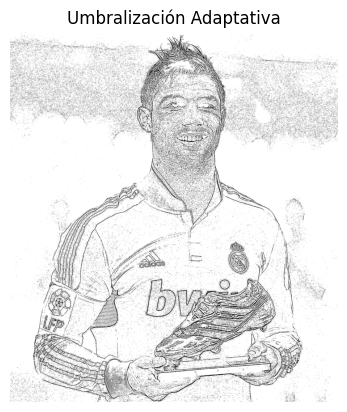

In [13]:
import cv2
import matplotlib.pyplot as plt

class ImageProcessor:
    def __init__(self, ruta):
        self.ruta = ruta
        self.imagen_original = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
        if self.imagen_original is None:
            raise ValueError(f"No se pudo cargar la imagen desde la ruta: {ruta}")
        self.imagen_umbralizada_simple = None
        self.imagen_umbralizada_adaptativa = None

    def mostrar_imagen(self, imagen, titulo):
        plt.imshow(imagen, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
        plt.show()

    def umbralizacion_simple(self, umbral=127, maxvalue=255):
        _, self.imagen_umbralizada_simple = cv2.threshold(self.imagen_original, umbral, maxvalue, cv2.THRESH_BINARY)
        return self.imagen_umbralizada_simple

    def umbralizacion_adaptativa(self, maxvalue=255, window_size=11, constante=5):
        self.imagen_umbralizada_adaptativa = cv2.adaptiveThreshold(self.imagen_original, maxvalue, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, window_size, constante)
        return self.imagen_umbralizada_adaptativa

    def procesar_imagen(self):
        self.mostrar_imagen(self.imagen_original, 'Imagen Original Escala de Grises')

        self.umbralizacion_simple()
        self.mostrar_imagen(self.imagen_umbralizada_simple, 'Umbralización Simple')

        self.umbralizacion_adaptativa()
        self.mostrar_imagen(self.imagen_umbralizada_adaptativa, 'Umbralización Adaptativa')


if __name__ == "__main__":
    ruta_imagen = 'cr7.png'
    procesador = ImageProcessor(ruta_imagen)
    procesador.procesar_imagen()

## Datos Interesantes

- ```Aplicaciones en Vision por Computadora``` => La umbralización es clave en la detección de bordes y la segmentación de imágenes, utilizada en sistemas de videovigilancia para poder identificar movimientos y en la robótica para la navegación.

- ```Procesamiento de Imágenes Médicas``` => Se aplica en el análisis de imágenes médicas, como resonancias magnéticas y tomografías computarizadas, lo que ayuda a los radiólgos a identificar estructuras y anomalías.
- ```El Aprendizaje Automático``` => La umbralización se utiliza como un paso previo en el procesamiento de datos para algoritmos de aprendizaje automático, lo que facilita la extracción de características relevantes para la clasificación de imágenes.
- ```Desafios``` => La umbralización puede resultar menos efectiva en condiciones de iluminación variable y en imágenes con ruido, lo que a menudo requiere de ajustes manuales o uso de técnicas más avanzadas.
- ```Interacción con otras Tecnicas``` => A menudo se suele combinar con filtración y detección de bordes para mejorar la calidad de la segmentación y de esta manera facilitar el análisis posterior.